In [19]:
import pandas as pd
wine_df = pd.read_csv('../newdataset/new_winequality.csv')
diabetes_df = pd.read_csv('../newdataset/new_diabetes.csv')

In [20]:
from sklearn.model_selection import train_test_split

# 資料分割 def
def split_data(df, target_column, test_size=0.2, random_state=42):

    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Usage example:
# Assuming 'origin_train_df' is your DataFrame and 'quality' is the target column
# X_train, X_test, y_train, y_test = split_data(origin_train_df, 'quality')
# print(X_train, y_train)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = split_data(wine_df, 'quality')
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = split_data(diabetes_df, 'diabetes')

In [21]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaler(X_train, X_test):

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler to the training data only
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert the scaled arrays back to DataFrame for better handling in pandas
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled

# 使用範例:
# X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)
X_train_scaled_wine, X_test_scaled_wine = apply_minmax_scaler(X_train_wine, X_test_wine)
X_train_scaled_diabetes, X_test_scaled_diabetes = apply_minmax_scaler(X_train_diabetes, X_test_diabetes)

In [22]:
from imblearn.over_sampling import ADASYN

def smote_sampling(X_train, y_train):
    # SMOTE过采样
    smote = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = smote.fit_resample(X_train, y_train)
    return X_train_adasyn, y_train_adasyn

X_train_adasyn_wine, y_train_adasyn_wine = smote_sampling(X_train_scaled_wine, y_train_wine)
X_train_adasyn_diabetes, y_train_adasyn_diabetes = smote_sampling(X_train_scaled_diabetes, y_train_diabetes)
X_train_adasyn_wine, y_train_adasyn_wine, X_train_adasyn_diabetes, y_train_adasyn_diabetes

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0          0.362832          0.390411     0.310000        0.143836   0.123539   
 1          0.132743          0.061644     0.400000        0.034247   0.090150   
 2          0.557522          0.184932     0.470000        0.061644   0.176962   
 3          0.371681          0.386986     0.260000        0.047945   0.126878   
 4          0.336283          0.626712     0.150000        0.349315   0.101836   
 ...             ...               ...          ...             ...        ...   
 2449       0.278324          0.369187     0.040564        0.175575   0.119424   
 2450       0.277976          0.428050     0.000000        0.085009   0.118188   
 2451       0.307371          0.423525     0.001669        0.108674   0.114077   
 2452       0.290423          0.424036     0.000000        0.094643   0.117013   
 2453       0.355119          0.530714     0.036632        0.074463   0.107853   
 
       free su

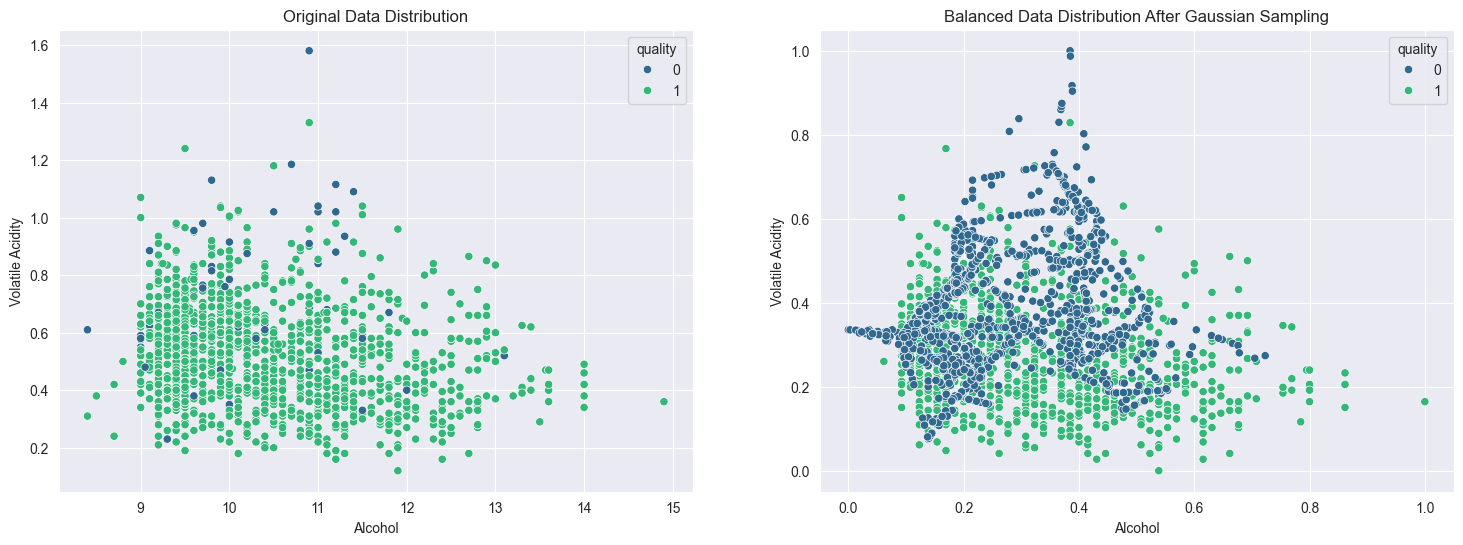

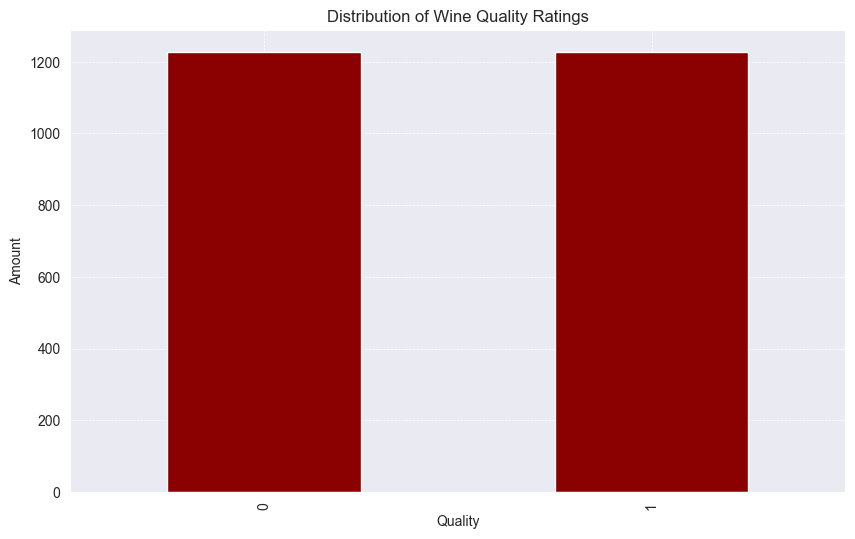

In [23]:
# 将过采样的特征和目标组合成一个DataFrame
adasyn_train_df = pd.DataFrame(X_train_adasyn_wine, columns=wine_df.columns[:-1])
adasyn_train_df['quality'] = y_train_adasyn_wine

import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=wine_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Volatile Acidity')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=adasyn_train_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Volatile Acidity')
plt.show()

plt.figure(figsize=(10, 6))
adasyn_train_df['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

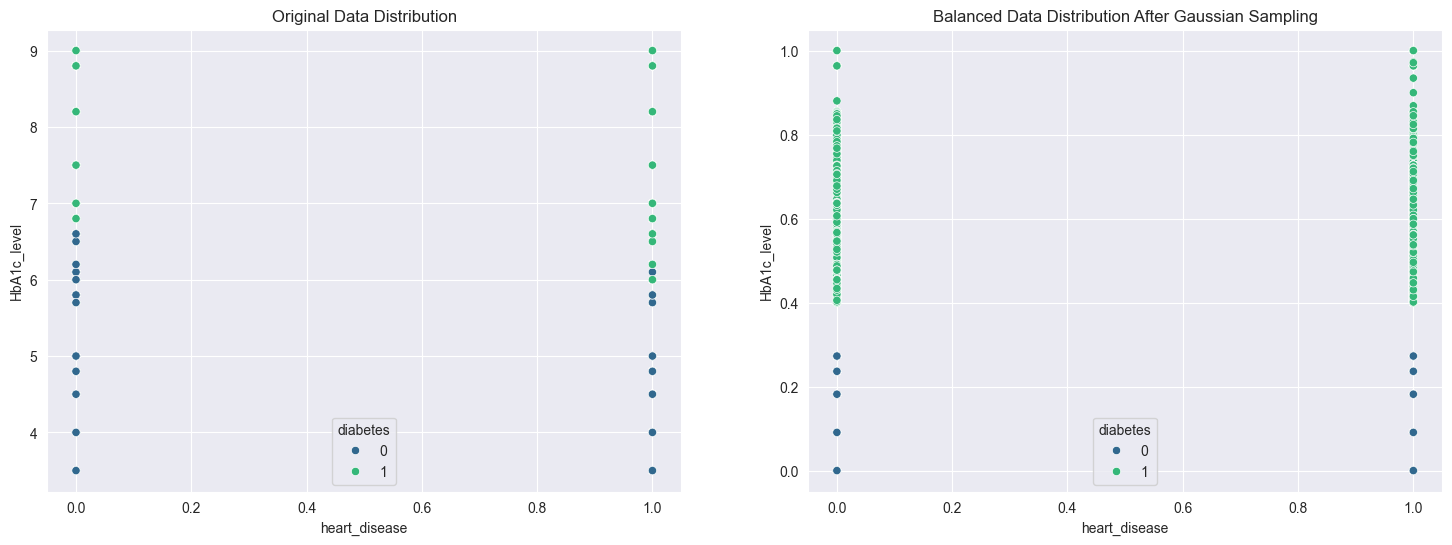

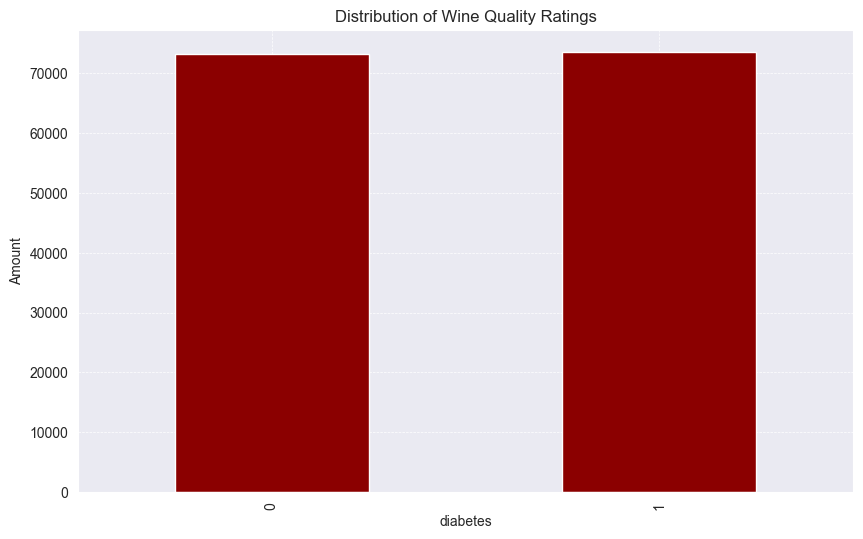

In [24]:
# 将过采样的特征和目标组合成一个DataFrame
adasyn_train_df_dia = pd.DataFrame(X_train_adasyn_diabetes, columns=diabetes_df.columns[:-1])
adasyn_train_df_dia['diabetes'] = y_train_adasyn_diabetes

import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=diabetes_df, x='heart_disease', y='HbA1c_level', hue='diabetes', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('heart_disease')
ax[0].set_ylabel('HbA1c_level')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=adasyn_train_df_dia, x='heart_disease', y='HbA1c_level', hue='diabetes', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('heart_disease')
ax[1].set_ylabel('HbA1c_level')
plt.show()

plt.figure(figsize=(10, 6))
adasyn_train_df_dia['diabetes'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('diabetes')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef
import matplotlib.pyplot as plt

In [26]:
def display_confusion_matrix(y_true, y_pred):

    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Assuming binary classification for simplicity; adjust if needed for multi-class
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Negative:0', 'Actual Positive:1'], 
                         columns=['Predicted Negative:0', 'Predicted Positive:1'])

    # Extracting TN, FP, FN, TP
    # TN, FP, FN, TP = cm.ravel()
    # print(f"True Negatives (TN): {TN}")
    # print(f"False Positives (FP): {FP}")
    # print(f"False Negatives (FN): {FN}")
    # print(f"True Positives (TP): {TP}")

    return cm_df

In [27]:
def train_evaluate_lr(X_train, X_test, y_train, y_test, model_name = 'logistic regression'):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)
    
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print("ROC_AUC:", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'LR (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [28]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, model_name = 'Random Forest'):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    print("ROC_AUC:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'RF (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [29]:
import numpy as np

def train_evaluate_svm(X_train, X_test, y_train, y_test, model_name = 'SVM'):
    # 初始化SVM模型  
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)  # 训练模型
    predictions = svm_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'SVM (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Wine Dataset Logistic Regression:
Accuracy: 0.734375
F1 Score: 0.8187555629728527
Precision: 0.995575221238938
Recall: 0.7281553398058253
G-mean: 0.8136088739827495
MCC: 0.25489699972786223
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.91      0.19        11
           1       1.00      0.73      0.84       309

    accuracy                           0.73       320
   macro avg       0.55      0.82      0.52       320
weighted avg       0.97      0.73      0.82       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                    10                     1
Actual Positive:1                    84                   225
ROC_AUC: 0.940864960282436


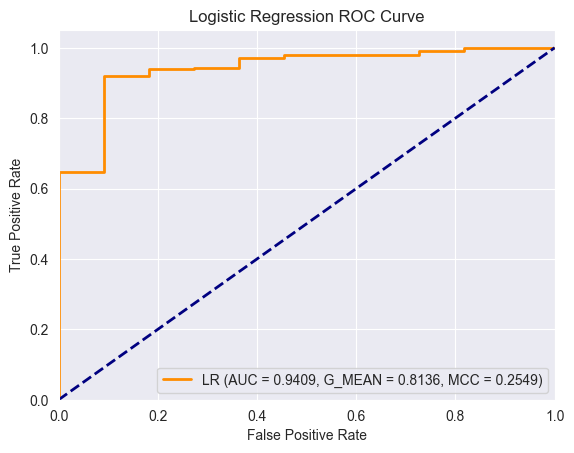

Wine Dataset Random Forest:
Accuracy: 0.940625
F1 Score: 0.941867644986259
Precision: 0.9707792207792207
Recall: 0.9676375404530745
G-mean: 0.419444988364619
MCC: 0.14332506543322734
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.18      0.17        11
           1       0.97      0.97      0.97       309

    accuracy                           0.94       320
   macro avg       0.57      0.57      0.57       320
weighted avg       0.94      0.94      0.94       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                     2                     9
Actual Positive:1                    10                   299
ROC_AUC: 0.8295086790232423


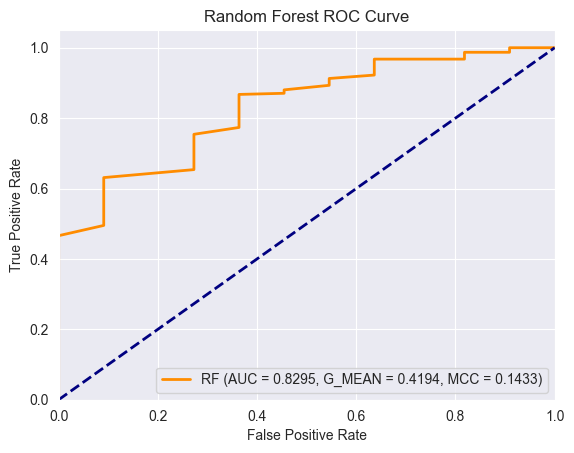

Wine Dataset SVM:
Accuracy: 0.728125
F1 Score: 0.8144341454647472
Precision: 0.9955357142857143
Recall: 0.7216828478964401
G-mean: 0.8099847629860027
MCC: 0.250778080010828
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.91      0.19        11
           1       1.00      0.72      0.84       309

    accuracy                           0.73       320
   macro avg       0.55      0.82      0.51       320
weighted avg       0.96      0.73      0.81       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                    10                     1
Actual Positive:1                    86                   223
ROC_AUC: 0.9417475728155339


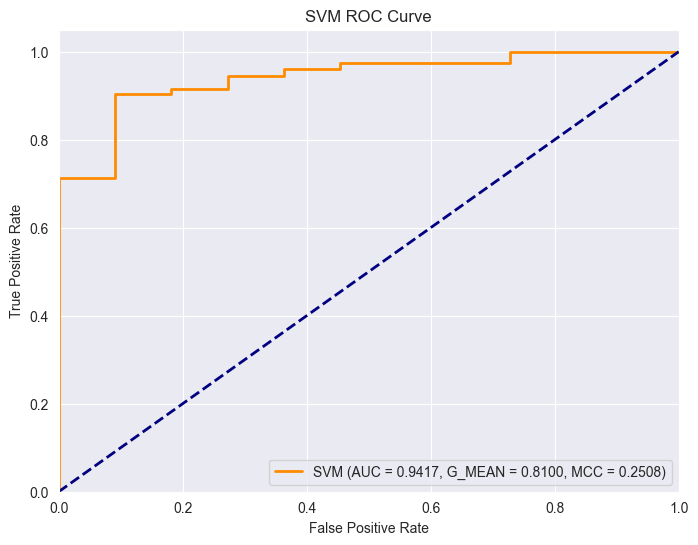

In [30]:
lr_wine_result = train_evaluate_lr(X_train_adasyn_wine, X_test_scaled_wine, y_train_adasyn_wine, y_test_wine, model_name='Wine Dataset Logistic Regression')
rf_wine_result = train_evaluate_rf(X_train_adasyn_wine, X_test_scaled_wine, y_train_adasyn_wine, y_test_wine, model_name='Wine Dataset Random Forest')
svn_wine_result = train_evaluate_svm(X_train_adasyn_wine, X_test_scaled_wine, y_train_adasyn_wine, y_test_wine, model_name='Wine Dataset SVM')

Diabetes Dataset Logistic Regression:
Accuracy: 0.81845
F1 Score: 0.8545498198633164
Precision: 0.3129741295467808
Recall: 0.9420374707259953
G-mean: 0.8718598355948317
MCC: 0.4789689572260155
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     18292
           1       0.31      0.94      0.47      1708

    accuracy                           0.82     20000
   macro avg       0.65      0.87      0.68     20000
weighted avg       0.94      0.82      0.85     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 14760                  3532
Actual Positive:1                    99                  1609
ROC_AUC: 0.9615192952371393


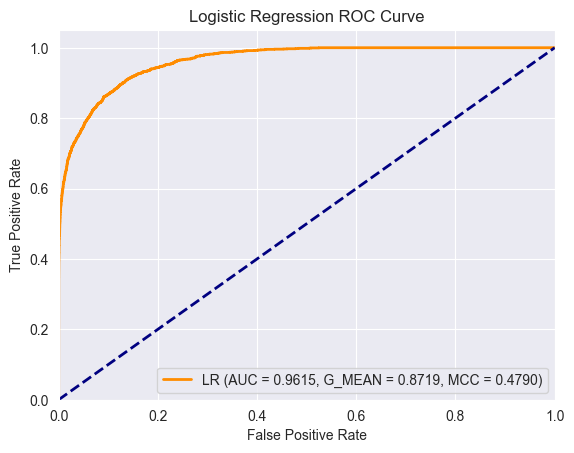

Diabetes Dataset Random Forest:
Accuracy: 0.95325
F1 Score: 0.9540520816751866
Precision: 0.7097124253933803
Recall: 0.765807962529274
G-mean: 0.8622121526169116
MCC: 0.7117018021388227
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.77      0.74      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.87      0.86     20000
weighted avg       0.96      0.95      0.95     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 17757                   535
Actual Positive:1                   400                  1308
ROC_AUC: 0.9679476534961599


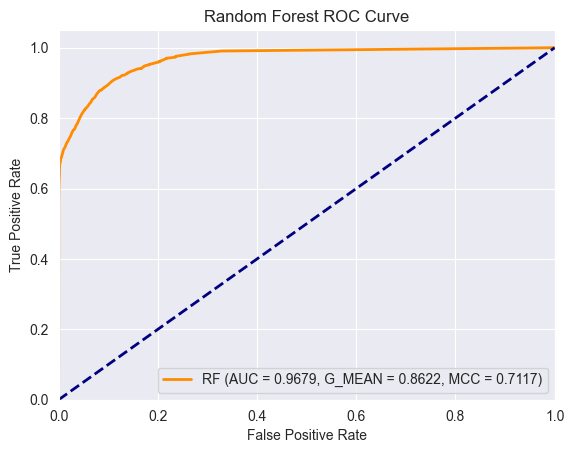

Diabetes Dataset SVM:
Accuracy: 0.8046
F1 Score: 0.8445043666394626
Precision: 0.29771974990805444
Recall: 0.9478922716627635
G-mean: 0.8660205067019965
MCC: 0.46425324537006823
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     18292
           1       0.30      0.95      0.45      1708

    accuracy                           0.80     20000
   macro avg       0.65      0.87      0.67     20000
weighted avg       0.93      0.80      0.84     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 14473                  3819
Actual Positive:1                    89                  1619
ROC_AUC: 0.9611669573368992


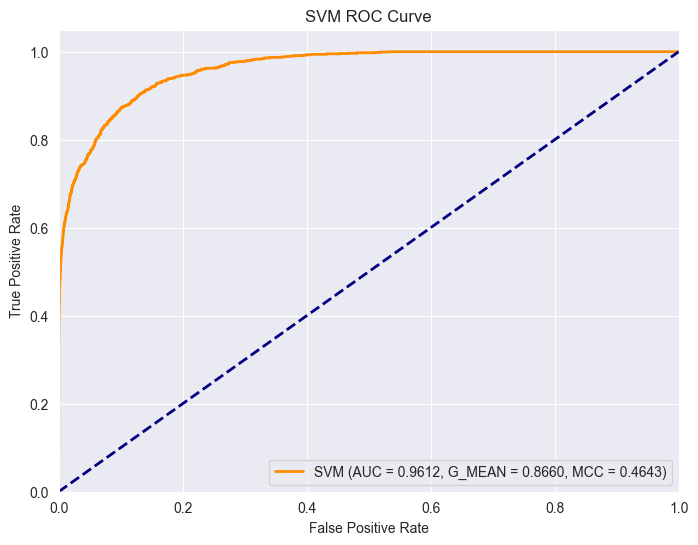

In [31]:
lr_diabetes_result = train_evaluate_lr(X_train_adasyn_diabetes, X_test_scaled_diabetes, y_train_adasyn_diabetes, y_test_diabetes, model_name='Diabetes Dataset Logistic Regression')
rf_diabetes_result = train_evaluate_rf(X_train_adasyn_diabetes, X_test_scaled_diabetes, y_train_adasyn_diabetes, y_test_diabetes, model_name='Diabetes Dataset Random Forest')
svn_diabetes_result = train_evaluate_svm(X_train_adasyn_diabetes, X_test_scaled_diabetes, y_train_adasyn_diabetes, y_test_diabetes, model_name='Diabetes Dataset SVM')